In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ses
import os
import time
from util import *

In [3]:
train = load_train()
test = load_test()

In [5]:
print "train shape",train.shape,"train columns", train.columns
print "test shape",test.shape,"test columns", test.columns

train shape (992931, 2) train columns Index([u'msno', u'is_churn'], dtype='object')
test shape (970960, 2) test columns Index([u'msno', u'is_churn'], dtype='object')


In [7]:
print "train id unique size:", len(train.msno.unique()), "train id is unique:",train.shape[0]==len(train.msno.unique())
print "test id unique size:", len(test.msno.unique()), "test id is unique:",test.shape[0]==len(test.msno.unique())

train id unique size: 992931 train id is unique: True
test id unique size: 970960 test id is unique: True


In [9]:
print "train and test intersect id size:", len(np.intersect1d(train.msno,test.msno))
print "train and test union id size:", len(np.union1d(train.msno,test.msno))
#train 和 test 有交叉

train and test intersect id size: 881701
train and test union id size: 1082190


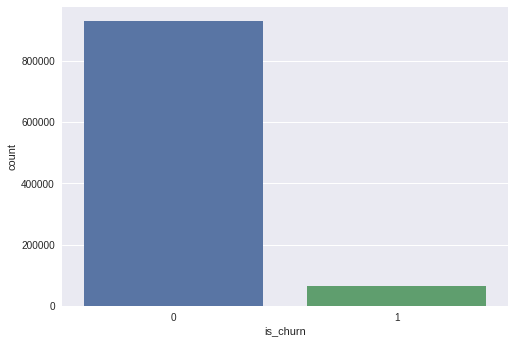

0.936077129227


In [11]:
ses.countplot(x="is_churn",data=train)
plt.show()
print float((train.is_churn==0).sum())/train.shape[0] # 6.4%流失，初步计算test中大概有9%流失
# train 中分布及其不均匀，大多数人不会流失，只有少数部分人会流失，可以先提交一个全部不流失的版本

In [4]:
train_churn = train[train.is_churn==1]
train_not_churn = train[train.is_churn==0]
print "in train, churn size:",train_churn.shape[0]
print "in train the churn people in test size:", np.in1d(train_churn.msno,test.msno).sum()
print "in train, not churn size:",train_not_churn.shape[0]
print "in train the not churn people in test size:", np.in1d(train_not_churn.msno,test.msno).sum()

in train, churn size: 63471
in train the churn people in test size: 16321
in train, not churn size: 929460
in train the not churn people in test size: 865380


In [4]:
members = load_members()

In [35]:
print "members:",members.shape,members.columns
print "members id unique:", members.shape[0]==len(members.msno.unique())
members["diff_from_20170228"] = pd.Timestamp(2017,2,28) - pd.to_datetime(members.registration_init_time,format="%Y%m%d")
members["diff_from_20170228"] = members.diff_from_20170228.map(lambda x:x.days)
# 首先members似乎不全
member_in_train_churn = members[np.in1d(members.msno,train_churn.msno)]
member_not_in_train_churn = members[np.in1d(members.msno,train_not_churn.msno)]
print "in train churn and in members",member_in_train_churn.shape[0]
print "not in train churn and in members",member_not_in_train_churn.shape[0]

in train churn and in members 57644
not in train churn and in members 818499


In [3]:
members.columns

Index([u'msno', u'city', u'bd', u'gender', u'registered_via',
       u'registration_init_time', u'expiration_date'],
      dtype='object')

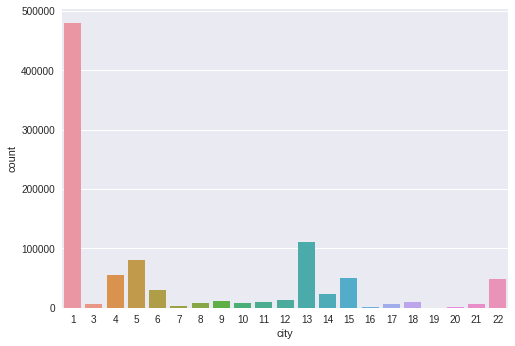

In [4]:
ses.countplot(x="city",data=members)
plt.show()

age min,max,mean -3152 2015 13.8462787554


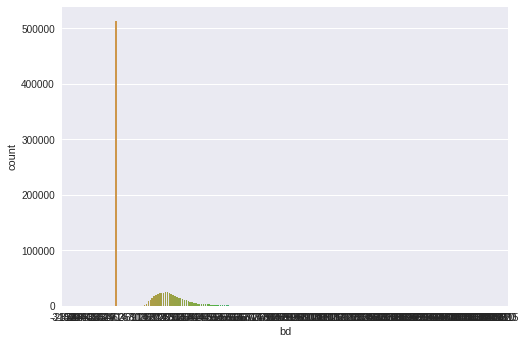

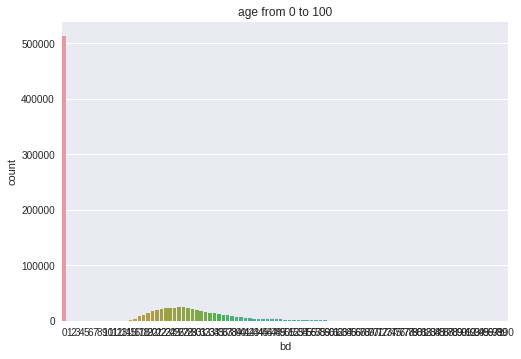

In [13]:
print "age min,max,mean", members.bd.min(), members.bd.max(), members.bd.mean()
ses.countplot(x="bd",data=members)
plt.show()
ses.countplot(x="bd",data=members[(members.bd >=0) & (members.bd <= 100)])
plt.title("age from 0 to 100")
plt.show()


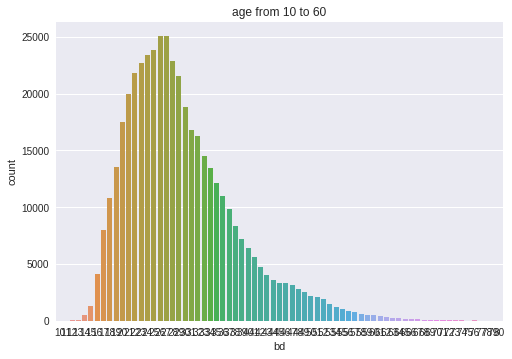

In [8]:
ses.countplot(x="bd",data=members[(members.bd >=10) & (members.bd <= 80)])
plt.title("age from 10 to 60")
plt.show()

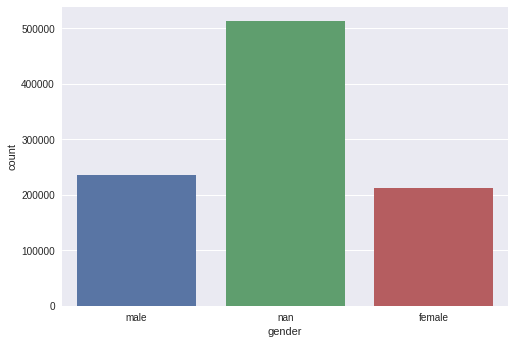

In [11]:
membersfna = members.fillna("nan")
ses.countplot(x="gender",data=membersfna)
plt.show()

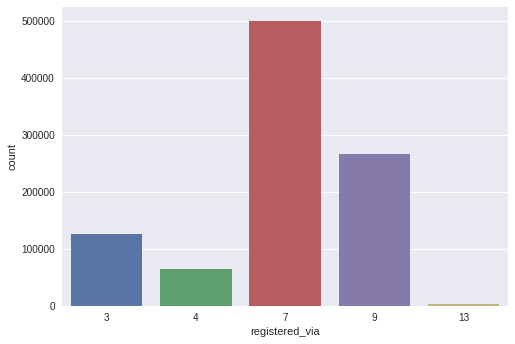

In [12]:
ses.countplot(x="registered_via",data=membersfna)
plt.show()

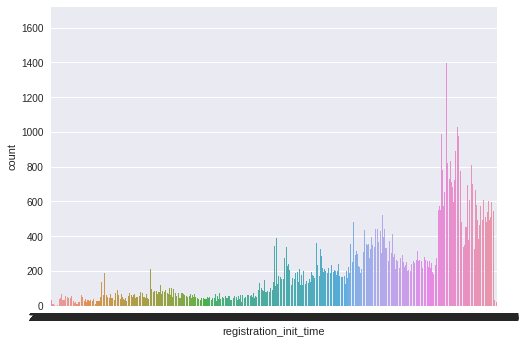

In [17]:
ses.countplot(x="registration_init_time",data=membersfna)
plt.show()

In [19]:
members["registration_init_datetime"] = pd.to_datetime(members.registration_init_time.astype(str))

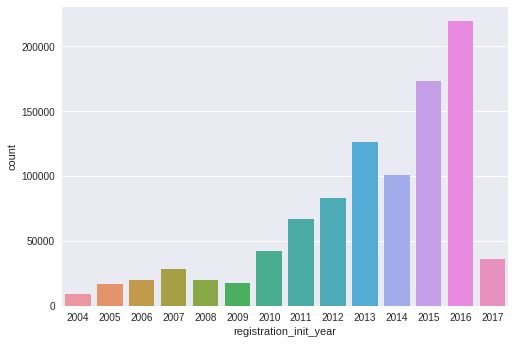

In [39]:
members["registration_init_year"] = members.registration_init_datetime.dt.year
ses.countplot(x="registration_init_year",data = members)
plt.show()

In [2]:
def fr_countplot(fr,label):
    ds = []
    loop = True
    while loop:
        try:
            _data = fr.get_chunk(1000000)[label]
            ds.append(_data)
        except StopIteration:
            loop=False
    ds = pd.concat(ds)
    ses.countplot(d2)
    plt.show()
    return ds
    

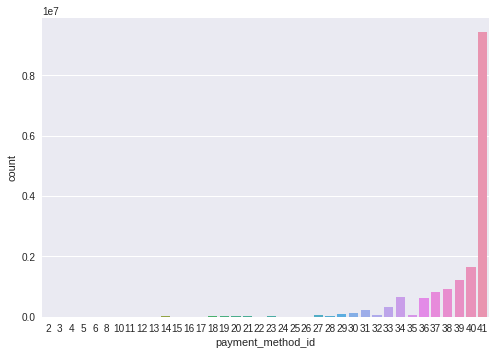

In [47]:
d_trans_payment = fr_countplot(load_transactions(),"payment_method_id")

In [5]:
d_trans_date = fr_countplot(load_transactions(),"transaction_date")

NameError: global name 'd2' is not defined

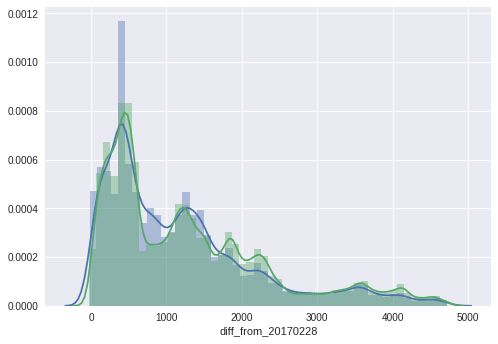

In [49]:
ses.distplot(member_in_train_churn.diff_from_20170228,label="churn")
ses.distplot(member_not_in_train_churn.diff_from_20170228,label="not_churn")
plt.show()

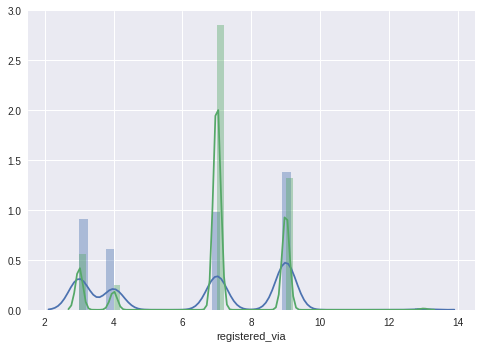

In [46]:
ses.distplot(member_in_train_churn.registered_via,label="churn")
ses.distplot(member_not_in_train_churn.registered_via,label="not_churn")
plt.show()

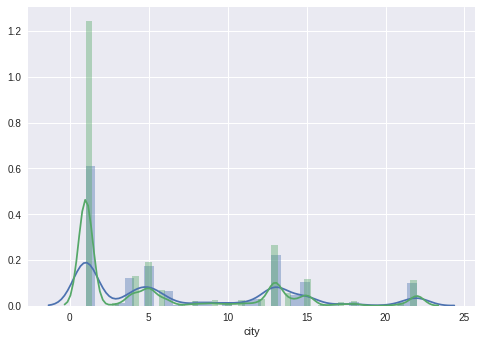

In [47]:
ses.distplot(member_in_train_churn.city,label="churn")
ses.distplot(member_not_in_train_churn.city,label="not_churn")
plt.show()

In [13]:
train = preprocess_transactions(None, "20170131", "../data/cache/train_do_trans.csv")

../data/cache/train_do_trans.csv  cache exist
preprocess transactions take time 17.9717841148 s


In [14]:
train_churn = train[train.is_churn==1]
train_not_churn = train[train.is_churn==0]

In [4]:
train.columns

Index([u'msno', u'is_churn', u'trans_all_time', u'trans_cancel_time',
       u'trans_no_cancel_time', u'tran_start_to_end', u'cancel_freq',
       u'no_cancel_freq'],
      dtype='object')